In [1]:
import re
from time import sleep
import random
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
import selenium
from selenium import webdriver
from selenium.common.exceptions import (NoSuchElementException,
                                        StaleElementReferenceException)
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager



## KVN

In [32]:
driver = webdriver.Chrome('/Users/naltukhov/Documents/programs/jokes-generator/selenium/chromedriver')
action = webdriver.ActionChains(driver)
driver.get('https://kvn.ru/jokes')

body = driver.find_element_by_css_selector('body')

In [31]:
joke_set = set()
joke_list = []
initial_i = 0

while True:
    jokes_box = driver.find_element_by_css_selector('.humor_box.font_14')
    jokes_elements = jokes_box.find_elements_by_css_selector('.humor_item.bottom_bord.p_rel')
    print(f'Number of jokes: {len(joke_set)}')
    for i  in range(initial_i, len(jokes_elements)):
        
        joke_element = jokes_elements[i]
        
        driver.execute_script("arguments[0].scrollIntoView();", joke_element)
        joke_text = joke_element.find_element_by_class_name('humor_text').text
        joke_author = joke_element.find_element_by_css_selector('.bold.font_12_1').text
        
        if joke_text not in joke_set:
            joke_set.add(joke_text)
            joke_list.append((joke_text, joke_author))
    
    initial_i = i - 1
    
#     sleep(0.5)
    body.send_keys(Keys.PAGE_DOWN)

Number of jokes: 0
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jokes: 6
Number of jo

KeyboardInterrupt: 

In [36]:
df = pd.DataFrame(joke_list, columns=['joke_text', 'joke_author'])

In [38]:
df.to_csv('/Users/naltukhov/Documents/programs/jokes-generator/kvn_dataset.tsv', sep='\t', index=False)

In [37]:
df.joke_author.unique()

array(['шоу-группа "Broadway"', 'Город 313', 'ЧП',
       'Меган Фокс РЭУ им. Г .В. Плеханова', 'Плюшки им. Ярослава Гашека',
       'Попурри, БГУКИ, Минск', 'Не такая',
       'Сборная Большого Московского Государственного Цирка',
       'Первая Олимпийская', 'Сборная Связистов России (экс "На Связи")',
       'Без дам', 'ШиК г. Пятигорск', 'Фирма, РЭУ им. Г.В. Плеханова',
       'Сборная юрфака МГУ «План Б»', 'Сборная города Королева',
       'Сборная Южного Подмосковья', 'ЭлектроШок',
       'Миусский парк, Москва',
       '"Георгий Валентиныч" РЭУ им. Г. В. Плеханова',
       'Женская версия, ГУУ', 'Сборная Первого Меда',
       'Сборная факультета журналистики МГУ', 'Доброжелательный Роман',
       'Сборная МЭИ по КВН', 'В объективе', 'Ассортимент, Москва',
       'Квартира №7', 'В активном поиске', '4 слова, НИУ ВШЭ',
       'Бомбиты, ГУУ', 'PEOPLE', 'Эта тета, НИЯУ МИФИ',
       'Институт Туризма', '"Так и пишется"',
       'Юра, ФУ при Правительстве РФ', 'Улица Казакова ГУЗ',
 

## Anecdotes

In [103]:
driver = webdriver.Chrome('/Users/naltukhov/Documents/programs/jokes-generator/selenium/chromedriver')
action = webdriver.ActionChains(driver)
driver.get('https://nekdo.ru/random/')

body = driver.find_element_by_css_selector('body')

In [104]:
df = pd.read_csv('/Users/naltukhov/Documents/programs/jokes-generator/anekdot-dataset/anekdot_dataset.tsv', 
                     sep='\t')
df.shape

(78585, 2)

In [105]:
jokes_set = set(df.joke_text.unique())
jokes_list = []

In [106]:
while True:
    print(f'Number of jokes: {len(jokes_set)}')
    WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.CLASS_NAME, 'content')))
    content_box = driver.find_element_by_class_name('content')

    dates_elements = content_box.find_elements_by_class_name('date')
    jokes_elements = content_box.find_elements_by_class_name('text')

    for (date_element, jokes_element) in zip(dates_elements, jokes_elements):
        likes = date_element.find_element_by_class_name('like').text
        joke_text = jokes_element.text

        if joke_text not in jokes_set:
            jokes_set.add(joke_text)
            jokes_list.append((joke_text, likes))
    
    driver.refresh()
    sleep(random.random())

Number of jokes: 78585
Number of jokes: 78595
Number of jokes: 78608
Number of jokes: 78622
Number of jokes: 78635
Number of jokes: 78650
Number of jokes: 78659
Number of jokes: 78672
Number of jokes: 78685
Number of jokes: 78696
Number of jokes: 78705
Number of jokes: 78721
Number of jokes: 78726
Number of jokes: 78738
Number of jokes: 78749
Number of jokes: 78761
Number of jokes: 78769
Number of jokes: 78782
Number of jokes: 78799
Number of jokes: 78809
Number of jokes: 78818
Number of jokes: 78826
Number of jokes: 78841
Number of jokes: 78851
Number of jokes: 78864
Number of jokes: 78875
Number of jokes: 78886
Number of jokes: 78893
Number of jokes: 78901
Number of jokes: 78907
Number of jokes: 78915
Number of jokes: 78928
Number of jokes: 78942
Number of jokes: 78950
Number of jokes: 78965
Number of jokes: 78972
Number of jokes: 78989
Number of jokes: 78998
Number of jokes: 79008
Number of jokes: 79022
Number of jokes: 79031
Number of jokes: 79044
Number of jokes: 79056
Number of j

Number of jokes: 82477
Number of jokes: 82489
Number of jokes: 82499
Number of jokes: 82506
Number of jokes: 82515
Number of jokes: 82523
Number of jokes: 82535
Number of jokes: 82544
Number of jokes: 82556
Number of jokes: 82569
Number of jokes: 82580
Number of jokes: 82592
Number of jokes: 82597
Number of jokes: 82607
Number of jokes: 82616
Number of jokes: 82629
Number of jokes: 82637
Number of jokes: 82643
Number of jokes: 82654
Number of jokes: 82667
Number of jokes: 82680
Number of jokes: 82688
Number of jokes: 82698
Number of jokes: 82706
Number of jokes: 82715
Number of jokes: 82723
Number of jokes: 82734
Number of jokes: 82746
Number of jokes: 82755
Number of jokes: 82769
Number of jokes: 82778
Number of jokes: 82786
Number of jokes: 82797
Number of jokes: 82805
Number of jokes: 82818
Number of jokes: 82827
Number of jokes: 82839
Number of jokes: 82849
Number of jokes: 82856
Number of jokes: 82865
Number of jokes: 82872
Number of jokes: 82882
Number of jokes: 82892
Number of j

TimeoutException: Message: 
Stacktrace:
0   chromedriver                        0x000000010e083b59 chromedriver + 2595673
1   chromedriver                        0x000000010e737b33 chromedriver + 9624371
2   chromedriver                        0x000000010de33773 chromedriver + 169843
3   chromedriver                        0x000000010de63acd chromedriver + 367309
4   chromedriver                        0x000000010de909c4 chromedriver + 551364
5   chromedriver                        0x000000010de7f72d chromedriver + 481069
6   chromedriver                        0x000000010de8ec46 chromedriver + 543814
7   chromedriver                        0x000000010de7f9f3 chromedriver + 481779
8   chromedriver                        0x000000010de59cd6 chromedriver + 326870
9   chromedriver                        0x000000010de5aba7 chromedriver + 330663
10  chromedriver                        0x000000010e051b09 chromedriver + 2390793
11  chromedriver                        0x000000010e05ebcc chromedriver + 2444236
12  chromedriver                        0x000000010e05e6ee chromedriver + 2442990
13  chromedriver                        0x000000010e038832 chromedriver + 2287666
14  chromedriver                        0x000000010e05f63f chromedriver + 2446911
15  chromedriver                        0x000000010e047299 chromedriver + 2347673
16  chromedriver                        0x000000010e0768b9 chromedriver + 2541753
17  chromedriver                        0x000000010e089008 chromedriver + 2617352
18  libsystem_pthread.dylib             0x00007fff203d6954 _pthread_start + 224
19  libsystem_pthread.dylib             0x00007fff203d24a7 thread_start + 15


In [107]:
new_df = pd.DataFrame(jokes_list, columns=['joke_text', 'likes'])
new_df.likes = new_df.likes.astype(int)
new_df.shape

(4315, 2)

In [108]:
df = df.append(new_df).drop_duplicates()
df.shape

(82900, 2)

In [109]:
df.to_csv('/Users/naltukhov/Documents/programs/jokes-generator/anekdot-dataset/anekdot_dataset.tsv', 
          sep='\t', index=False)

In [110]:
df.shape

(82900, 2)

In [111]:
df.loc[df.likes > 50].sample().values

array([['- Да пошел ты на восемь букв!\n- Это куда?!\n- В п#зду.\n- Так там же пять букв.\n- В п#зде остальные три и найдешь!',
        61]], dtype=object)

<AxesSubplot:>

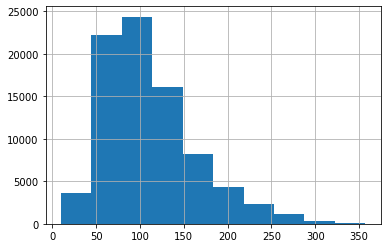

In [112]:
df.joke_text.apply(len).hist()